In [1]:
# data preprocessing
import datetime
import pandas_datareader.data as pdr
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
start_time_all = datetime.datetime(2020, 1, 1) # 2020-01-01
end_time_train = datetime.datetime(2021, 9, 30) # 2020-09-30
start_time_val = datetime.datetime(2021, 10, 1) # 2020-10-01
end_time_all = datetime.datetime(2022, 11, 9) # 2020-12-31

# loading Tesla, Inc. (TSLA) stock price data from Yahoo Finance
# tsla_price_df = pdr.DataReader('TSLA', 'yahoo', start_time_all, end_time_all)
tsla_price_df = yf.download(tickers="TSLA",period="600d",interval="60m",auto_adjust=True)
tsla_price_df.info()


[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4192 entries, 2020-12-22 09:30:00 to 2023-05-11 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4192 non-null   float64
 1   High    4192 non-null   float64
 2   Low     4192 non-null   float64
 3   Close   4192 non-null   float64
 4   Volume  4192 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 196.5 KB


In [3]:
tsla_price_df.tail()

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-05-11 12:30:00,168.860001,169.710007,168.729996,169.100494,8509353
2023-05-11 13:30:00,169.119995,169.490005,168.642899,169.390106,7676390
2023-05-11 14:30:00,169.408005,170.479996,169.360001,169.940002,10395013
2023-05-11 15:30:00,169.929993,173.570007,169.360001,172.059998,17558921
2023-05-11 16:00:00,172.080002,172.080002,172.080002,172.080002,0


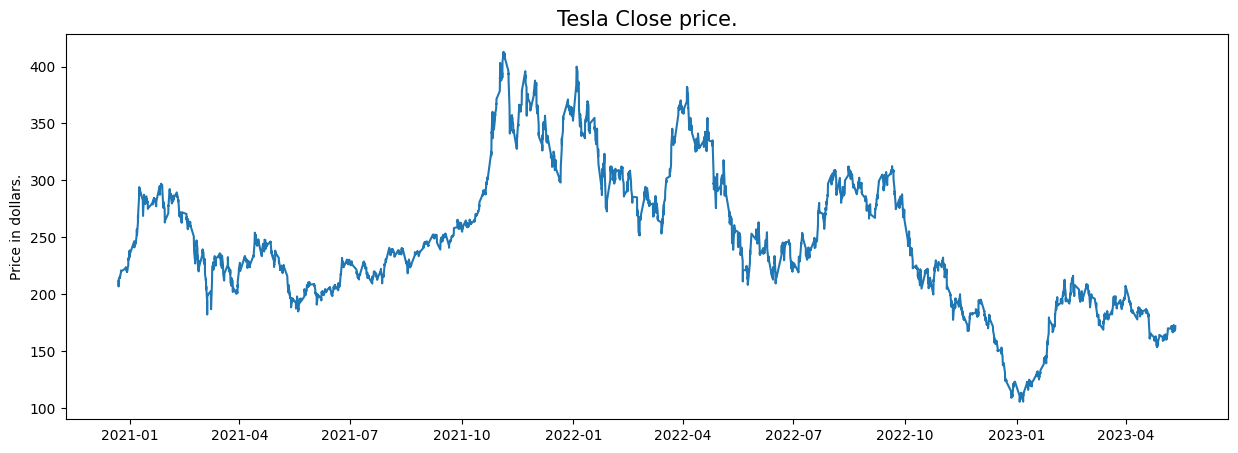

In [4]:
plt.figure(figsize=(15,5))
plt.plot(tsla_price_df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [11]:
# tsla_price_df=tsla_price_df.drop('Adj Close',axis='columns')


In [5]:
tsla_price_df

,Open,High,Low,Close,Volume
Datetime,,,,,
2020-12-22 09:30:00,214.766663,216.626663,210.673340,211.614990,13428536
2020-12-22 10:30:00,211.627609,212.606674,206.133347,208.016663,10956901
2020-12-22 11:30:00,208.066666,209.830002,204.743332,206.913330,8391516
2020-12-22 12:30:00,206.933334,209.330002,206.873367,208.089493,3547901
2020-12-22 13:30:00,208.097961,212.516663,207.463333,211.273087,6133646
...,...,...,...,...,...
2023-05-11 12:30:00,168.860001,169.710007,168.729996,169.100494,8509353
2023-05-11 13:30:00,169.119995,169.490005,168.642899,169.390106,7676390
2023-05-11 14:30:00,169.408005,170.479996,169.360001,169.940002,10395013


C:\Users\rohit\AppData\Local\Temp\ipykernel_13496\950529388.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
C:\Users\rohit\AppData\Local\Temp\ipykernel_13496\950529388.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(tsla_price_df[col])
C:\Users\rohit\AppData\Local\Temp\ipykernel_13496\950529388.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) 

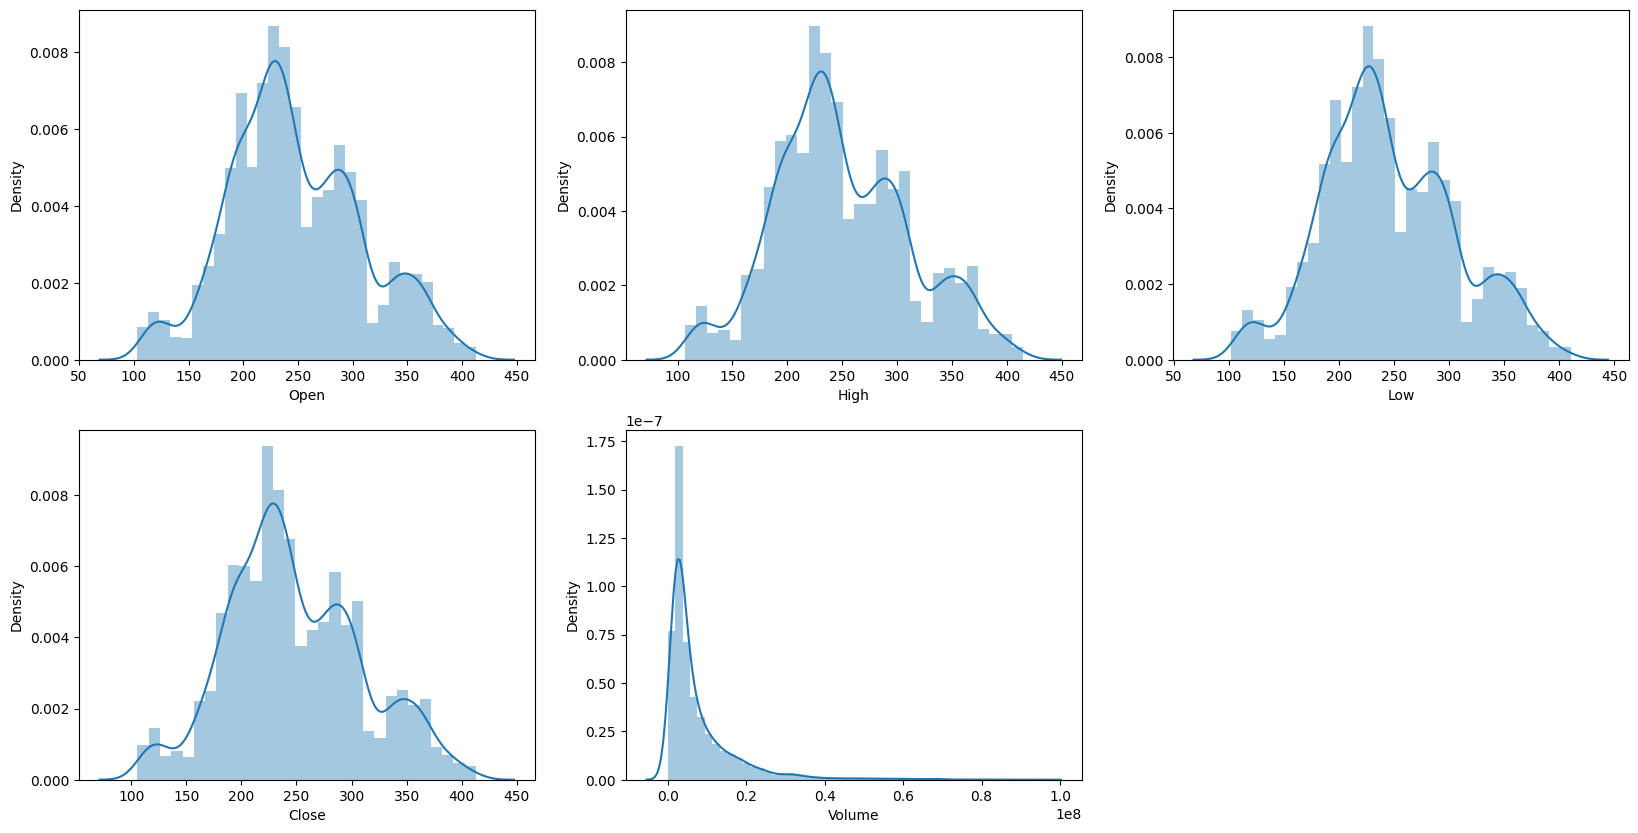

In [5]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(tsla_price_df[col])
plt.show()


C:\Users\rohit\AppData\Local\Temp\ipykernel_15500\379634240.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


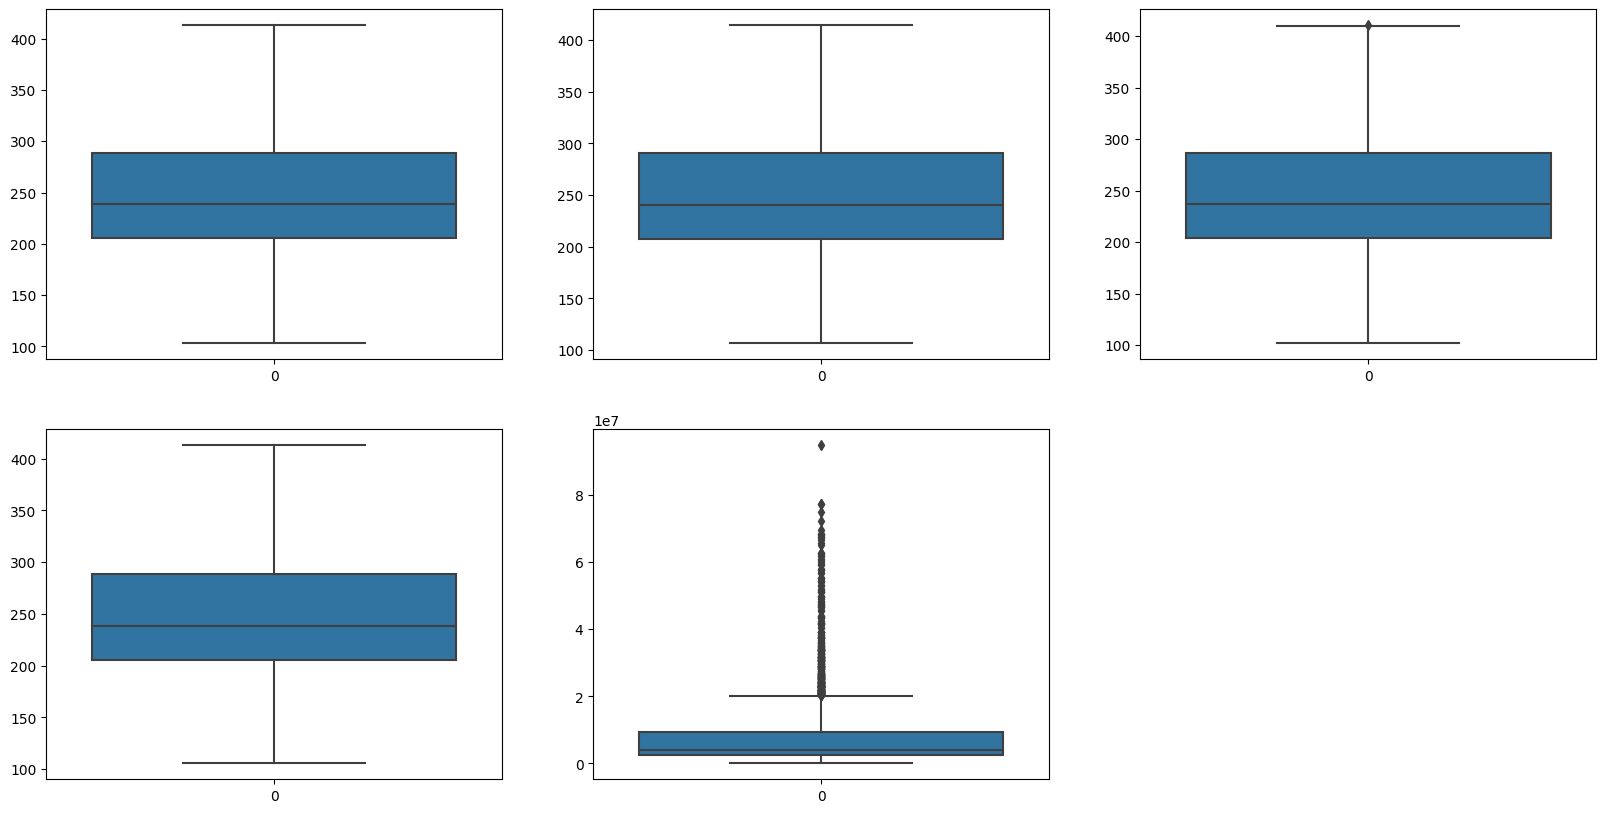

In [8]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(tsla_price_df[col])
plt.show()


In [11]:
tsla_price_df['Tomorrow']=tsla_price_df['Close'].shift(-1)
tsla_price_df

,Open,High,Low,Close,Volume,Tomorrow
Datetime,,,,,,
2020-12-22 09:30:00,214.766663,216.626663,210.673340,211.614990,13428536,208.016663
2020-12-22 10:30:00,211.627609,212.606674,206.133347,208.016663,10956901,206.913330
2020-12-22 11:30:00,208.066666,209.830002,204.743332,206.913330,8391516,208.089493
2020-12-22 12:30:00,206.933334,209.330002,206.873367,208.089493,3547901,211.273087
2020-12-22 13:30:00,208.097961,212.516663,207.463333,211.273087,6133646,211.752762
...,...,...,...,...,...,...
2023-05-11 12:30:00,168.860001,169.710007,168.729996,169.100494,8509353,169.390106
2023-05-11 13:30:00,169.119995,169.490005,168.642899,169.390106,7676390,169.940002
2023-05-11 14:30:00,169.408005,170.479996,169.360001,169.940002,10395013,172.059998


In [12]:
tsla_price_df['Target']=(tsla_price_df['Tomorrow']>tsla_price_df['Close']).astype(int)
tsla_price_df

,Open,High,Low,Close,Volume,Tomorrow,Target
Datetime,,,,,,,
2020-12-22 09:30:00,214.766663,216.626663,210.673340,211.614990,13428536,208.016663,0
2020-12-22 10:30:00,211.627609,212.606674,206.133347,208.016663,10956901,206.913330,0
2020-12-22 11:30:00,208.066666,209.830002,204.743332,206.913330,8391516,208.089493,1
2020-12-22 12:30:00,206.933334,209.330002,206.873367,208.089493,3547901,211.273087,1
2020-12-22 13:30:00,208.097961,212.516663,207.463333,211.273087,6133646,211.752762,1
...,...,...,...,...,...,...,...
2023-05-11 12:30:00,168.860001,169.710007,168.729996,169.100494,8509353,169.390106,1
2023-05-11 13:30:00,169.119995,169.490005,168.642899,169.390106,7676390,169.940002,1
2023-05-11 14:30:00,169.408005,170.479996,169.360001,169.940002,10395013,172.059998,1


In [13]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,min_samples_split=100, random_state=1)



In [14]:
train=tsla_price_df.iloc[:-100] #training using all the days except the last 100
test=tsla_price_df.iloc[-100:] #testing wrt the last 100 days

#creating a list to predict the target  
predictors=['Close','Volume','Open','High','Low']
model.fit(train[predictors],train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [15]:
from sklearn.metrics import precision_score
preds=model.predict(test[predictors])
preds

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [16]:
#converting data into a more readable format
preds=pd.Series(preds,index=test.index)
preds

Datetime
2023-04-21 15:30:00    1
2023-04-24 09:30:00    0
2023-04-24 10:30:00    0
2023-04-24 11:30:00    1
2023-04-24 12:30:00    0
                      ..
2023-05-11 12:30:00    0
2023-05-11 13:30:00    1
2023-05-11 14:30:00    0
2023-05-11 15:30:00    0
2023-05-11 16:00:00    1
Length: 100, dtype: int32

In [17]:
ps=precision_score(test['Target'],preds)
print(f'The precision of the model using Random forest is: {ps}')

The precision of the model using Random forest is: 0.4827586206896552


<AxesSubplot: xlabel='Datetime'>

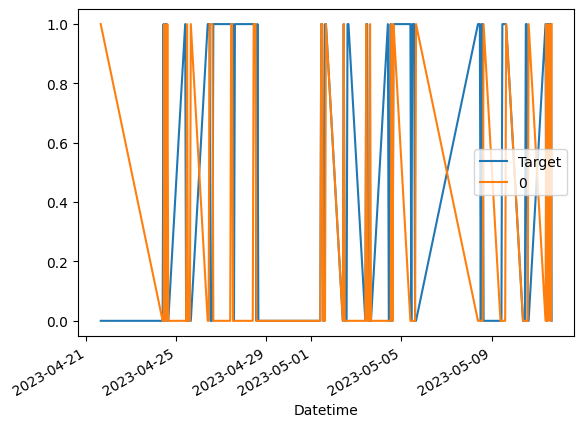

In [18]:
combined=pd.concat([test['Target'],preds],axis=1)
combined.plot()